-----
# 3.3 The leapfrog method - efficient time integration
In this part, we solve a simple one dimensional harmonic oscillator equation using the leapfrog method.

First, we solve the equation for position and velocity for different values of $k$ and plot the results.

Next, we investigate how the initial velocity at the half step affects the accuracy of the method by comparing it to the analytical solution and testing with different sizes of the time steps $\Delta t$.

Finally, we add an external time-dependent sinusoidal driving force and investigate what happens when the driving force is close to the original frequency of the oscillator and show the phase plot (v, x) of various frequencies. 

_by: Anezka Potesilova_

In [1]:
from src.leapfrog import leapfrog, plot_leapfrog_various_k, plot_leapfrog_errors
import numpy as np
import matplotlib.pyplot as plt

### I. Leapfrog method

We test three values of $k = 0.5, 2, 10$ and the default time step size $\Delta t = 0.01$, and we plot the position and velocity for each of them.

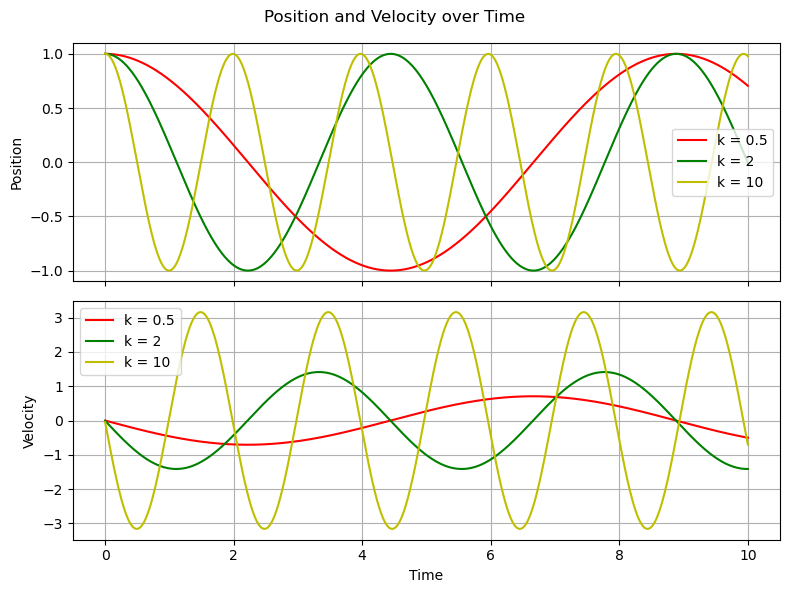

In [ ]:
T = 10

def F_x(x, k):
    return -k * x

k_values = [0.5, 2, 10]
positions = []
velocities = []

for k in k_values:
    x_list, v_list = leapfrog(T, F_x, k)
    positions.append(x_list)
    velocities.append(v_list)

plot_leapfrog_various_k(positions, velocities, k_values, T, save=False)